### Use station mapping tool to map grids to station
1. Create a dictionary to configure the station mapping tool inputs and parameters.
    <br>The three parameters are criterias used to find optimum/ best-match grid. 
    
2. Call and apply the imported python station mapping tool with the configured input.
    <br>This willgenerate the dataframe containing station-grid locations following nearest neighbor approach ("near_grid") and the newly found best-match grid ("optimum_grid") 

In [3]:
from hat.mapping.station_mapping import station_mapping

# 1.  a configuration dictionary
config = {
    # Netcdf information
    "upstream_area_file": "/home/dadiyorto/freelance/02_ort_ecmwf/dev/hat/hat/mapping/upArea.nc",  # file path
    # Station Metadata CSV information
    "csv_file": "/home/dadiyorto/freelance/02_ort_ecmwf/dev/hat/hat/mapping/outlets.csv",  # file path
    "csv_lat_col": "StationLat",  # column name for latitude (string)
    "csv_lon_col": "StationLon",  # column name for longitude (string)
    "csv_station_name_col": "StationName",  # column name for station  (string)
    "csv_ups_col": "DrainingArea.km2.Provider",  # column name for metadata of upstream  (string)
    # Mapping parameters (3x)
    "max_neighboring_cells": 5,  # Parameter 1: maximum radius to search for best cells (no. of cells)
    "max_area_diff": 20,  # Parameter 2: acceptable/ optimum upstream area difference (%)
    "min_area_diff": 0,  # Parameter 3: minimum upstream area difference (%) between nearest grid and the station metadata
    # manual mapping as reference for evaluation (optional)
    "manual_lat_col": "LisfloodY",  # column name for latitude of manually mapped station (string)
    "manual_lon_col": "LisfloodX",  # column name for longitude of manually mapped station (string)
    "manual_area": "DrainingArea.km2.LDD",  # column name for area of manually mapped station (string)
    # if Output directory is provided, it will save the geodataframe outputs to geojson and csv readable by GIS or jupyter interactive
    # "out_directory": None # put none if you don't want to save the output
    "out_directory": "/home/dadiyorto/freelance/02_ort_ecmwf/dev/hat/hat/mapping/output",
}

# 2. Call the station mapping function with the config dictionary
df = station_mapping(config)

### Evaluate the station mapping output
#### evaluate between manual mapping and <b>optimum grid approach

No of stations within 10% upstream area difference margin: 
  Not found: 473
  Found: 3224
  - Found at right location: 1959
  - Found but NOT at right location: 1265


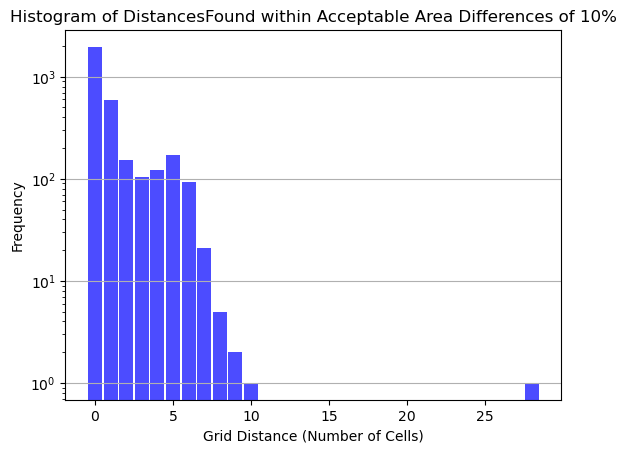

In [4]:
from hat.mapping.evaluation import count_and_analyze_area_distance

# Count number of stations with area difference within acceptable area error margin and perfect distance
error_margin = 10  # acceptable error margin for area difference (%)
perfect_distance = 0  # perfect distance (cells) away from reference grid

fig = count_and_analyze_area_distance(
    df,
    error_margin,
    perfect_distance,
    ref_name="manual",
    eval_name="optimum_grid",
    y_scale="log",
)